<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Bow-분석" data-toc-modified-id="Bow-분석-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Bow 분석</a></span><ul class="toc-item"><li><span><a href="#불용어-삭제" data-toc-modified-id="불용어-삭제-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>불용어 삭제</a></span></li></ul></li><li><span><a href="#real_word_list를-하나의-리스트로-합쳐주어야-CounterVectorizer-사용-가능!!" data-toc-modified-id="real_word_list를-하나의-리스트로-합쳐주어야-CounterVectorizer-사용-가능!!-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>real_word_list를 하나의 리스트로 합쳐주어야 CounterVectorizer 사용 가능!!</a></span></li><li><span><a href="#여기부터-인셉션-정보" data-toc-modified-id="여기부터-인셉션-정보-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>여기부터 인셉션 정보</a></span><ul class="toc-item"><li><span><a href="#conver_cv-정의" data-toc-modified-id="conver_cv-정의-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>conver_cv 정의</a></span></li></ul></li><li><span><a href="#실질-Bow-유사도-분석에는-인덱싱은-없어도-되는-듯-하다" data-toc-modified-id="실질-Bow-유사도-분석에는-인덱싱은-없어도-되는-듯-하다-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>실질 Bow 유사도 분석에는 인덱싱은 없어도 되는 듯 하다</a></span></li><li><span><a href="#여기부터는-상위-50개로-새로운-BoW-생성" data-toc-modified-id="여기부터는-상위-50개로-새로운-BoW-생성-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>여기부터는 상위 50개로 새로운 BoW 생성</a></span><ul class="toc-item"><li><span><a href="#내림차순-정렬" data-toc-modified-id="내림차순-정렬-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>내림차순 정렬</a></span></li><li><span><a href="#상위-50개-추출" data-toc-modified-id="상위-50개-추출-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>상위 50개 추출</a></span></li><li><span><a href="#리스트-합치기" data-toc-modified-id="리스트-합치기-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>리스트 합치기</a></span></li><li><span><a href="#인셉션-정의" data-toc-modified-id="인셉션-정의-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>인셉션 정의</a></span></li></ul></li></ul></div>

In [66]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
import time
import os
import datetime
import codecs
import pytagcloud
import webbrowser
import matplotlib
import matplotlib.pyplot as plt

from matplotlib import font_manager, rc
from bs4 import BeautifulSoup
from konlpy.tag import Twitter

pygame 1.9.6
Hello from the pygame community. https://www.pygame.org/contribute.html


In [6]:
# !pip install selenium

In [7]:
# 크롤링할 웹 사이트 정보
base_url = 'https://movie.daum.net' # 크롤링할 사이트 ( 기본  url)
my_url = '/moviedb/grade?movieId=43569&type=netizen&page='
subject_name= '다크나이트' #



In [8]:
movie_review_list = []

In [11]:
options = Options()
options.headless = True #//// 이 구문을 실행시키면 window 화면에 실행 없이 Background에서 실행된다.
browser = webdriver.Chrome(options=options) # chrome web driver를 같은 폴더에 넣어 주어야함
# 직접 실행시키고 
browser.implicitly_wait(0.2) #1초 휴식

for a in range(1,100) :
#     options = Options()
#     options.headless = True
#     browser = webdriver.Chrome(options=options) # chrome web driver를 같은 폴더에 넣어 주어야함
#     browser.implicitly_wait(0.2) 
    url =base_url+my_url+str(a)
    print(url)
    browser.get(url)
#     print(base_url+my_url+a)
    time.sleep(0.2) 
    html = browser.page_source
    soup = BeautifulSoup(html, 'html.parser')
    #구분선
    first_lists = soup.findAll('p', {'class' : 'desc_review'})
    #webdriver.quit() 더 알아보기
    print('success')
    for item in first_lists:
        data = item.text  
        movie_review_list.append(data)
        

https://movie.daum.net/moviedb/grade?movieId=43569&type=netizen&page=1
success
https://movie.daum.net/moviedb/grade?movieId=43569&type=netizen&page=2
success
https://movie.daum.net/moviedb/grade?movieId=43569&type=netizen&page=3
success
https://movie.daum.net/moviedb/grade?movieId=43569&type=netizen&page=4
success
https://movie.daum.net/moviedb/grade?movieId=43569&type=netizen&page=5
success
https://movie.daum.net/moviedb/grade?movieId=43569&type=netizen&page=6
success
https://movie.daum.net/moviedb/grade?movieId=43569&type=netizen&page=7
success
https://movie.daum.net/moviedb/grade?movieId=43569&type=netizen&page=8
success
https://movie.daum.net/moviedb/grade?movieId=43569&type=netizen&page=9
success
https://movie.daum.net/moviedb/grade?movieId=43569&type=netizen&page=10
success
https://movie.daum.net/moviedb/grade?movieId=43569&type=netizen&page=11
success
https://movie.daum.net/moviedb/grade?movieId=43569&type=netizen&page=12
success
https://movie.daum.net/moviedb/grade?movieId=4356

In [12]:
movie_review_list

[' \n                                            명작\n                                        ',
 ' \n                                            개간지 오토바이\n                                        ',
 ' \n                                            명백한 수작... 의심없다\n                                        ',
 ' \n                                            몇 번을 봐도 만족스러운 명작.\n                                        ',
 ' \n',
 ' \n',
 ' \n                                            세계 최강 불록버스터\n                                        ',
 ' \n                                            한 순간도 눈을 뗄 수 없다.\n                                        ',
 ' \n                                            드디어 용아맥에서 보다\n                                        ',
 ' \n                                            하비의 광기어린 잘못된 행동은 공감이 안 되지만 영화 자체는 지금봐도 재미있다.\n                                        ',
 ' \n                                            명작\n                                        ',
 ' \n       

In [26]:
second_review_list=[]
for line in movie_review_list:
    replace_line=line.strip(' \n\t')
#     de_list=line.rstrip('\t')
#     de_list2=de_list.rstrip('\n')
    second_review_list.append(replace_line)
second_review_list

['명작',
 '개간지 오토바이',
 '명백한 수작... 의심없다',
 '몇 번을 봐도 만족스러운 명작.',
 '',
 '',
 '세계 최강 불록버스터',
 '한 순간도 눈을 뗄 수 없다.',
 '드디어 용아맥에서 보다',
 '하비의 광기어린 잘못된 행동은 공감이 안 되지만 영화 자체는 지금봐도 재미있다.',
 '명작',
 '개간지 오토바이',
 '명백한 수작... 의심없다',
 '몇 번을 봐도 만족스러운 명작.',
 '',
 '',
 '세계 최강 불록버스터',
 '한 순간도 눈을 뗄 수 없다.',
 '드디어 용아맥에서 보다',
 '하비의 광기어린 잘못된 행동은 공감이 안 되지만 영화 자체는 지금봐도 재미있다.',
 '무슨 말이 필요하리요~~이번에는 배트맨과 조커 둘 다 주연이다!!!!!',
 '진심으로  멋진 어둠의 전사!!!   2020년 버전 배트맨을 제대로 봐야한다고 생각합니다!!   완전 최고!!',
 '이게 벌써 12년이나 흘렀다니;; 시간은 흘러도  여전하네',
 '',
 '말이필요없는 명작이다',
 '',
 '그냥최강이다',
 '재개봉으로 방금 보고 다시 지려버림...\n마블은 죽을 때까지 못 뛰어넘을 DC의 걸작',
 '',
 '원작 파괴는 싫어하지만 이 영화는 인정할 수밖에 없다',
 '악역이 착한 역할보다 좋다니..',
 '최고!!',
 '',
 '배트맨 비긴즈보다 훨씬 뛰어난 어둠의 기사',
 '',
 '진정 악에 맞서는 정의가 되고자 한다면 어둠조차 받아들여라',
 '영화',
 '정의란 무엇인가. \n인간은 자신의 이익에 따라 두가지 가면을 쓰고 있다.',
 'DC영화중에서 가장 재미있고 명작이다!\nWhy so serious?',
 '히어로물에 연기력과 철학까지 담아낼 줄이야. 조커 연기는 다시 봐도 압권.',
 '',
 '베트맨과 악당일뿐',
 '디씨의 다크함이 잘 드러난 영화이자 디씨의 마지막 호황기',
 '와...이제 봐도 good',
 '',
 'good',
 '',
 '',
 '10년이 넘은 영화지만 너무나 잘만들었고\n조커의

In [53]:
second_review_list

['명작',
 '개간지 오토바이',
 '명백한 수작... 의심없다',
 '몇 번을 봐도 만족스러운 명작.',
 '세계 최강 불록버스터',
 '한 순간도 눈을 뗄 수 없다.',
 '드디어 용아맥에서 보다',
 '하비의 광기어린 잘못된 행동은 공감이 안 되지만 영화 자체는 지금봐도 재미있다.',
 '명작',
 '개간지 오토바이',
 '명백한 수작... 의심없다',
 '몇 번을 봐도 만족스러운 명작.',
 '세계 최강 불록버스터',
 '한 순간도 눈을 뗄 수 없다.',
 '드디어 용아맥에서 보다',
 '하비의 광기어린 잘못된 행동은 공감이 안 되지만 영화 자체는 지금봐도 재미있다.',
 '무슨 말이 필요하리요~~이번에는 배트맨과 조커 둘 다 주연이다!!!!!',
 '진심으로  멋진 어둠의 전사!!!   2020년 버전 배트맨을 제대로 봐야한다고 생각합니다!!   완전 최고!!',
 '이게 벌써 12년이나 흘렀다니;; 시간은 흘러도  여전하네',
 '말이필요없는 명작이다',
 '그냥최강이다',
 '재개봉으로 방금 보고 다시 지려버림...\n마블은 죽을 때까지 못 뛰어넘을 DC의 걸작',
 '원작 파괴는 싫어하지만 이 영화는 인정할 수밖에 없다',
 '악역이 착한 역할보다 좋다니..',
 '최고!!',
 '배트맨 비긴즈보다 훨씬 뛰어난 어둠의 기사',
 '진정 악에 맞서는 정의가 되고자 한다면 어둠조차 받아들여라',
 '영화',
 '정의란 무엇인가. \n인간은 자신의 이익에 따라 두가지 가면을 쓰고 있다.',
 'DC영화중에서 가장 재미있고 명작이다!\nWhy so serious?',
 '히어로물에 연기력과 철학까지 담아낼 줄이야. 조커 연기는 다시 봐도 압권.',
 '베트맨과 악당일뿐',
 '디씨의 다크함이 잘 드러난 영화이자 디씨의 마지막 호황기',
 '와...이제 봐도 good',
 'good',
 '10년이 넘은 영화지만 너무나 잘만들었고\n조커의 연기는 너무나 완벽했다\n배트맨.슈퍼맨 시리즈는 좋아하지 않지만\n이 다크나이트 만큼은 정말 재미있게 보았다\n너무

In [50]:
review_list1 = second_review_list

In [51]:
review_list1.remove('')

In [52]:
review_list1

['명작',
 '개간지 오토바이',
 '명백한 수작... 의심없다',
 '몇 번을 봐도 만족스러운 명작.',
 '세계 최강 불록버스터',
 '한 순간도 눈을 뗄 수 없다.',
 '드디어 용아맥에서 보다',
 '하비의 광기어린 잘못된 행동은 공감이 안 되지만 영화 자체는 지금봐도 재미있다.',
 '명작',
 '개간지 오토바이',
 '명백한 수작... 의심없다',
 '몇 번을 봐도 만족스러운 명작.',
 '세계 최강 불록버스터',
 '한 순간도 눈을 뗄 수 없다.',
 '드디어 용아맥에서 보다',
 '하비의 광기어린 잘못된 행동은 공감이 안 되지만 영화 자체는 지금봐도 재미있다.',
 '무슨 말이 필요하리요~~이번에는 배트맨과 조커 둘 다 주연이다!!!!!',
 '진심으로  멋진 어둠의 전사!!!   2020년 버전 배트맨을 제대로 봐야한다고 생각합니다!!   완전 최고!!',
 '이게 벌써 12년이나 흘렀다니;; 시간은 흘러도  여전하네',
 '말이필요없는 명작이다',
 '그냥최강이다',
 '재개봉으로 방금 보고 다시 지려버림...\n마블은 죽을 때까지 못 뛰어넘을 DC의 걸작',
 '원작 파괴는 싫어하지만 이 영화는 인정할 수밖에 없다',
 '악역이 착한 역할보다 좋다니..',
 '최고!!',
 '배트맨 비긴즈보다 훨씬 뛰어난 어둠의 기사',
 '진정 악에 맞서는 정의가 되고자 한다면 어둠조차 받아들여라',
 '영화',
 '정의란 무엇인가. \n인간은 자신의 이익에 따라 두가지 가면을 쓰고 있다.',
 'DC영화중에서 가장 재미있고 명작이다!\nWhy so serious?',
 '히어로물에 연기력과 철학까지 담아낼 줄이야. 조커 연기는 다시 봐도 압권.',
 '베트맨과 악당일뿐',
 '디씨의 다크함이 잘 드러난 영화이자 디씨의 마지막 호황기',
 '와...이제 봐도 good',
 'good',
 '10년이 넘은 영화지만 너무나 잘만들었고\n조커의 연기는 너무나 완벽했다\n배트맨.슈퍼맨 시리즈는 좋아하지 않지만\n이 다크나이트 만큼은 정말 재미있게 보았다\n너무

In [55]:
for i in range(35):
    review_list1.remove('')

In [59]:
# review_list1.count('\n')
review_list1

['명작',
 '개간지 오토바이',
 '명백한 수작... 의심없다',
 '몇 번을 봐도 만족스러운 명작.',
 '세계 최강 불록버스터',
 '한 순간도 눈을 뗄 수 없다.',
 '드디어 용아맥에서 보다',
 '하비의 광기어린 잘못된 행동은 공감이 안 되지만 영화 자체는 지금봐도 재미있다.',
 '명작',
 '개간지 오토바이',
 '명백한 수작... 의심없다',
 '몇 번을 봐도 만족스러운 명작.',
 '세계 최강 불록버스터',
 '한 순간도 눈을 뗄 수 없다.',
 '드디어 용아맥에서 보다',
 '하비의 광기어린 잘못된 행동은 공감이 안 되지만 영화 자체는 지금봐도 재미있다.',
 '무슨 말이 필요하리요~~이번에는 배트맨과 조커 둘 다 주연이다!!!!!',
 '진심으로  멋진 어둠의 전사!!!   2020년 버전 배트맨을 제대로 봐야한다고 생각합니다!!   완전 최고!!',
 '이게 벌써 12년이나 흘렀다니;; 시간은 흘러도  여전하네',
 '말이필요없는 명작이다',
 '그냥최강이다',
 '재개봉으로 방금 보고 다시 지려버림...\n마블은 죽을 때까지 못 뛰어넘을 DC의 걸작',
 '원작 파괴는 싫어하지만 이 영화는 인정할 수밖에 없다',
 '악역이 착한 역할보다 좋다니..',
 '최고!!',
 '배트맨 비긴즈보다 훨씬 뛰어난 어둠의 기사',
 '진정 악에 맞서는 정의가 되고자 한다면 어둠조차 받아들여라',
 '영화',
 '정의란 무엇인가. \n인간은 자신의 이익에 따라 두가지 가면을 쓰고 있다.',
 'DC영화중에서 가장 재미있고 명작이다!\nWhy so serious?',
 '히어로물에 연기력과 철학까지 담아낼 줄이야. 조커 연기는 다시 봐도 압권.',
 '베트맨과 악당일뿐',
 '디씨의 다크함이 잘 드러난 영화이자 디씨의 마지막 호황기',
 '와...이제 봐도 good',
 'good',
 '10년이 넘은 영화지만 너무나 잘만들었고\n조커의 연기는 너무나 완벽했다\n배트맨.슈퍼맨 시리즈는 좋아하지 않지만\n이 다크나이트 만큼은 정말 재미있게 보았다\n너무

In [61]:
result_df = pd.DataFrame(data={'description' : review_list1, 'dummy' : '1'})

In [62]:
result_df.to_excel(str(subject_name)+'_초본.xlsx')

In [63]:
# result_2=result_2.drop('열2',  axis=1)
result_df

,description,dummy
0,명작,1
1,개간지 오토바이,1
2,명백한 수작... 의심없다,1
3,몇 번을 봐도 만족스러운 명작.,1
4,세계 최강 불록버스터,1
...,...,...
553,"[♨][영읽여]히스레져의 유작이지요,그거아세요?이 영화의 감독 크리스토퍼놀란의 감독...",1
554,많은 생각을 하게 한다. 멋지다,1
555,재밌는영화지만 잭니콜슨의 조커를 잊을수가없다 \n더구나 스타일에선 팀버튼의 배트맨시...,1
556,이런 히어로물이 또 나올 수 있을까...놀란 감독 자신이 아니라면 이 정도 수준의 ...,1


In [64]:
full_text=' '
for line in review_list1:
    full_text=full_text + ''+str(line)
full_text_lines = full_text.split("\r\n")

In [65]:
full_text_lines

[' 명작개간지 오토바이명백한 수작... 의심없다몇 번을 봐도 만족스러운 명작.세계 최강 불록버스터한 순간도 눈을 뗄 수 없다.드디어 용아맥에서 보다하비의 광기어린 잘못된 행동은 공감이 안 되지만 영화 자체는 지금봐도 재미있다.명작개간지 오토바이명백한 수작... 의심없다몇 번을 봐도 만족스러운 명작.세계 최강 불록버스터한 순간도 눈을 뗄 수 없다.드디어 용아맥에서 보다하비의 광기어린 잘못된 행동은 공감이 안 되지만 영화 자체는 지금봐도 재미있다.무슨 말이 필요하리요~~이번에는 배트맨과 조커 둘 다 주연이다!!!!!진심으로  멋진 어둠의 전사!!!   2020년 버전 배트맨을 제대로 봐야한다고 생각합니다!!   완전 최고!!이게 벌써 12년이나 흘렀다니;; 시간은 흘러도  여전하네말이필요없는 명작이다그냥최강이다재개봉으로 방금 보고 다시 지려버림...\n마블은 죽을 때까지 못 뛰어넘을 DC의 걸작원작 파괴는 싫어하지만 이 영화는 인정할 수밖에 없다악역이 착한 역할보다 좋다니..최고!!배트맨 비긴즈보다 훨씬 뛰어난 어둠의 기사진정 악에 맞서는 정의가 되고자 한다면 어둠조차 받아들여라영화정의란 무엇인가. \n인간은 자신의 이익에 따라 두가지 가면을 쓰고 있다.DC영화중에서 가장 재미있고 명작이다!\nWhy so serious?히어로물에 연기력과 철학까지 담아낼 줄이야. 조커 연기는 다시 봐도 압권.베트맨과 악당일뿐디씨의 다크함이 잘 드러난 영화이자 디씨의 마지막 호황기와...이제 봐도 goodgood10년이 넘은 영화지만 너무나 잘만들었고\n조커의 연기는 너무나 완벽했다\n배트맨.슈퍼맨 시리즈는 좋아하지 않지만\n이 다크나이트 만큼은 정말 재미있게 보았다\n너무나 유명한 영화라서 더이상 설명은 \n무의미한 영화...조커가 히스레저 그사람이란걸\n뒤늦게 알았음.\n히스레저 \n당신은 훌륭한 배우였어요그냥 말이필요없다캐릭터들이 주는 몰입감.혼돈은 모두에게 공평하다.크리스토퍼 놀란의 배트맨이 아닌 다른 감독의 배트맨은 어떨지 상상도 안되지만 진정한 슈퍼히어로는 진짜 크리스

In [68]:
twitter = Twitter()
for line in full_text_lines:
    malist = twitter.pos(line)

C:\Users\user\anaconda3\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [70]:
malist[3]

('오토바이', 'Noun')

In [76]:
word_dic = {}
for word in malist:# word : dict 이다. word[0] : key, word[1] : value 인것, 
                    #따라서 아래는 value가 Noun인 경우를 찾는 것
        if word[1] == "Noun":
            if not (word[0] in word_dic):
                word_dic[word[0]] = 0
            word_dic[word[0]] += 1  # 카운트하기
        elif word[1] == "Adjective": ## 형용사도 포함시키기 
            if not (word[0] in word_dic):
                word_dic[word[0]] = 0
            word_dic[word[0]] += 1

In [107]:
word_dic

{'명작': 32,
 '간지': 3,
 '오토바이': 3,
 '명백한': 2,
 '수작': 8,
 '의심': 2,
 '없다': 14,
 '몇': 6,
 '번': 19,
 '만족스러운': 2,
 '세계': 2,
 '최강': 4,
 '버스터': 3,
 '순간': 7,
 '눈': 9,
 '수': 43,
 '맥': 2,
 '하비': 10,
 '광기': 3,
 '행동': 4,
 '공감': 5,
 '안': 7,
 '자체': 8,
 '지금': 7,
 '재미있다': 2,
 '무슨': 4,
 '말': 37,
 '필요하리요': 1,
 '이번': 1,
 '배트맨': 95,
 '조커': 107,
 '둘': 4,
 '주연': 1,
 '진심': 1,
 '멋진': 3,
 '어둠': 11,
 '전사': 1,
 '버전': 2,
 '제대로': 4,
 '야한다고': 1,
 '생각': 27,
 '완전': 6,
 '최고': 94,
 '이': 52,
 '벌써': 1,
 '시간': 8,
 '여전하네말이': 1,
 '필요없는': 5,
 '다재': 1,
 '개봉': 12,
 '방금': 1,
 '보고': 21,
 '다시': 35,
 '마블': 6,
 '죽': 3,
 '때': 17,
 '못': 4,
 '의': 9,
 '걸작': 11,
 '원작': 4,
 '파괴': 2,
 '싫어하지만': 1,
 '인정': 4,
 '악역': 14,
 '착한': 1,
 '역할': 3,
 '좋다니': 1,
 '비긴즈': 6,
 '뛰어난': 4,
 '기사': 7,
 '진정': 3,
 '악': 30,
 '정의': 15,
 '란': 3,
 '무엇': 13,
 '인간': 20,
 '자신': 8,
 '이익': 1,
 '가지': 5,
 '가면': 2,
 '있다': 8,
 '가장': 13,
 '재미있고': 1,
 '히어로': 65,
 '물': 31,
 '연기력': 13,
 '철학': 24,
 '낼': 1,
 '줄': 8,
 '연기': 51,
 '압권': 2,
 '베트맨': 14,
 '당일': 1,
 '디씨': 4,
 '다크': 8,
 '함':

In [110]:
only_word_list=[]
for word in word_dic:
#     print(word)
    only_word_list.append(word)
only_word_list

['명작',
 '간지',
 '오토바이',
 '명백한',
 '수작',
 '의심',
 '없다',
 '몇',
 '번',
 '만족스러운',
 '세계',
 '최강',
 '버스터',
 '순간',
 '눈',
 '수',
 '맥',
 '하비',
 '광기',
 '행동',
 '공감',
 '안',
 '자체',
 '지금',
 '재미있다',
 '무슨',
 '말',
 '필요하리요',
 '이번',
 '배트맨',
 '조커',
 '둘',
 '주연',
 '진심',
 '멋진',
 '어둠',
 '전사',
 '버전',
 '제대로',
 '야한다고',
 '생각',
 '완전',
 '최고',
 '이',
 '벌써',
 '시간',
 '여전하네말이',
 '필요없는',
 '다재',
 '개봉',
 '방금',
 '보고',
 '다시',
 '마블',
 '죽',
 '때',
 '못',
 '의',
 '걸작',
 '원작',
 '파괴',
 '싫어하지만',
 '인정',
 '악역',
 '착한',
 '역할',
 '좋다니',
 '비긴즈',
 '뛰어난',
 '기사',
 '진정',
 '악',
 '정의',
 '란',
 '무엇',
 '인간',
 '자신',
 '이익',
 '가지',
 '가면',
 '있다',
 '가장',
 '재미있고',
 '히어로',
 '물',
 '연기력',
 '철학',
 '낼',
 '줄',
 '연기',
 '압권',
 '베트맨',
 '당일',
 '디씨',
 '다크',
 '함',
 '화이자',
 '마지막',
 '호황',
 '기와',
 '이제',
 '완벽했다',
 '슈퍼맨',
 '시리즈',
 '좋아하지',
 '다크나이트',
 '정말',
 '재미있게',
 '유명한',
 '더',
 '이상',
 '설명',
 '무의미한',
 '히스',
 '레저',
 '사람',
 '걸',
 '뒤늦게',
 '당신',
 '훌륭한',
 '그냥',
 '필요없다',
 '캐릭터',
 '몰입',
 '감',
 '혼돈',
 '모두',
 '공평하다',
 '크리스토퍼',
 '놀란',
 '아닌',
 '다른',
 '감독',
 '어떨지',
 '상상',
 '안되지만',
 '진정한',


In [78]:
word_dic2=sorted(word_dic.items(), key=lambda x: x[1], reverse=True)
#영화 라는 단어는 크게 의미가 없으니까 삭제 하자. 

[('영화', 281),
 ('조커', 107),
 ('배트맨', 95),
 ('최고', 94),
 ('히스', 71),
 ('히어로', 65),
 ('레저', 61),
 ('이', 52),
 ('연기', 51),
 ('다크나이트', 51),
 ('수', 43),
 ('것', 39),
 ('말', 37),
 ('놀란', 37),
 ('영웅', 36),
 ('다시', 35),
 ('명작', 32),
 ('정말', 32),
 ('선', 32),
 ('물', 31),
 ('악', 30),
 ('그', 30),
 ('더', 29),
 ('시리즈', 28),
 ('감독', 28),
 ('진짜', 28),
 ('점', 28),
 ('생각', 27),
 ('철학', 24),
 ('중', 22),
 ('내', 22),
 ('보고', 21),
 ('있는', 21),
 ('인간', 20),
 ('번', 19),
 ('완벽한', 19),
 ('정도', 19),
 ('이런', 19),
 ('배우', 18),
 ('때', 17),
 ('작품', 17),
 ('없는', 17),
 ('액션', 17),
 ('평점', 16),
 ('정의', 15),
 ('마지막', 15),
 ('악당', 15),
 ('없다', 14),
 ('악역', 14),
 ('베트맨', 14),
 ('사람', 14),
 ('그냥', 14),
 ('라이즈', 14),
 ('주인공', 14),
 ('무엇', 13),
 ('가장', 13),
 ('연기력', 13),
 ('최고다', 13),
 ('왜', 13),
 ('거', 13),
 ('하나', 13),
 ('또', 13),
 ('개봉', 12),
 ('역시', 12),
 ('대한', 12),
 ('어둠', 11),
 ('걸작', 11),
 ('걸', 11),
 ('크리스토퍼', 11),
 ('다른', 11),
 ('이영화', 11),
 ('볼', 11),
 ('스토리', 11),
 ('하비', 10),
 ('아닌', 10),
 ('베일', 10),
 ('이건', 10)

In [157]:
word_dic2=sorted(word_dic.items(), key=lambda x: x[1], reverse=True)
word_dic2

[('조커', 107),
 ('배트맨', 95),
 ('최고', 94),
 ('히스', 71),
 ('히어로', 65),
 ('레저', 61),
 ('이', 52),
 ('연기', 51),
 ('다크나이트', 51),
 ('수', 43),
 ('것', 39),
 ('말', 37),
 ('놀란', 37),
 ('영웅', 36),
 ('다시', 35),
 ('명작', 32),
 ('정말', 32),
 ('선', 32),
 ('물', 31),
 ('악', 30),
 ('그', 30),
 ('더', 29),
 ('시리즈', 28),
 ('감독', 28),
 ('진짜', 28),
 ('점', 28),
 ('생각', 27),
 ('철학', 24),
 ('중', 22),
 ('내', 22),
 ('보고', 21),
 ('있는', 21),
 ('인간', 20),
 ('번', 19),
 ('완벽한', 19),
 ('정도', 19),
 ('이런', 19),
 ('배우', 18),
 ('때', 17),
 ('작품', 17),
 ('없는', 17),
 ('액션', 17),
 ('평점', 16),
 ('정의', 15),
 ('마지막', 15),
 ('악당', 15),
 ('없다', 14),
 ('악역', 14),
 ('베트맨', 14),
 ('사람', 14),
 ('그냥', 14),
 ('라이즈', 14),
 ('주인공', 14),
 ('무엇', 13),
 ('가장', 13),
 ('연기력', 13),
 ('최고다', 13),
 ('왜', 13),
 ('거', 13),
 ('하나', 13),
 ('또', 13),
 ('개봉', 12),
 ('역시', 12),
 ('대한', 12),
 ('어둠', 11),
 ('걸작', 11),
 ('걸', 11),
 ('크리스토퍼', 11),
 ('다른', 11),
 ('이영화', 11),
 ('볼', 11),
 ('스토리', 11),
 ('하비', 10),
 ('아닌', 10),
 ('베일', 10),
 ('이건', 10),
 ('미국', 10),

In [79]:
del word_dic['영화']

In [ ]:
word_df=pd.DataFrame(data={'count' : word_dic, 'dummy' : '1'})

In [92]:
word_df.sort_values(by=['count'], axis=0, ascending = False)

,count,dummy
조커,107,1
배트맨,95,1
최고,94,1
히스,71,1
히어로,65,1
...,...,...
비애,1,1
비슷한,1,1
비디오,1,1
비긴스,1,1


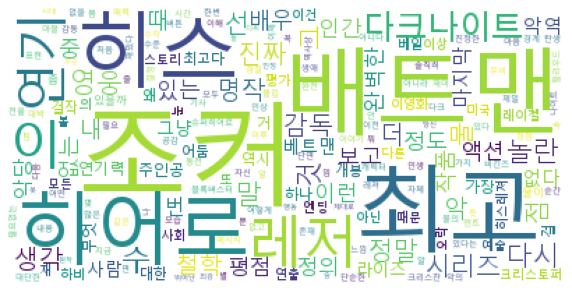

In [80]:
from wordcloud import WordCloud
stock_wc = WordCloud(background_color="white", font_path='./font/malgun.ttf')
stock_wc.generate_from_frequencies(word_dic)

import matplotlib.pyplot as plt
figure = plt.figure()
figure.set_size_inches(10, 10)
ax = figure.add_subplot(1, 1, 1)
ax.axis("off")
ax.imshow(stock_wc)

## Bow 분석

### 불용어 삭제

In [118]:
movie_stop_words = "이 파 외 얼 편 심 초 은 장 체 해 술 과 신 봉 짊 틀 색 애 갓 풀 세 두 금 분 준 후 비 발 켜 요 질 랄 빨 날 움 스러 진 수 것 말 선 물 그 더 진짜 점 중 내 번 때 정도 왜 컬 손 인 카 만 놈 논 거 또 걸 볼 때문 재 눈 의 좀 함 자 를 적 곳 뿐 정 줄 안 듯 나 몇 뭐 임 앞 알 팀 면 별 꼭 속 둘 숨 역 개 뭘 게 배 위 난 죽 란 감 레 건 어"
movie_stop_words = movie_stop_words.split(' ')


In [119]:
movie_stop_words

['이',
 '파',
 '외',
 '얼',
 '편',
 '심',
 '초',
 '은',
 '장',
 '체',
 '해',
 '술',
 '과',
 '신',
 '봉',
 '짊',
 '틀',
 '색',
 '애',
 '갓',
 '풀',
 '세',
 '두',
 '금',
 '분',
 '준',
 '후',
 '비',
 '발',
 '켜',
 '요',
 '질',
 '랄',
 '빨',
 '날',
 '움',
 '스러',
 '진',
 '수',
 '것',
 '말',
 '선',
 '물',
 '그',
 '더',
 '진짜',
 '점',
 '중',
 '내',
 '번',
 '때',
 '정도',
 '왜',
 '컬',
 '손',
 '인',
 '카',
 '만',
 '놈',
 '논',
 '거',
 '또',
 '걸',
 '볼',
 '때문',
 '재',
 '눈',
 '의',
 '좀',
 '함',
 '자',
 '를',
 '적',
 '곳',
 '뿐',
 '정',
 '줄',
 '안',
 '듯',
 '나',
 '몇',
 '뭐',
 '임',
 '앞',
 '알',
 '팀',
 '면',
 '별',
 '꼭',
 '속',
 '둘',
 '숨',
 '역',
 '개',
 '뭘',
 '게',
 '배',
 '위',
 '난',
 '죽',
 '란',
 '감',
 '레',
 '건',
 '어']

In [135]:
real_word_list=[]
for word in only_word_list:
    if not (word in movie_stop_words): 
        real_word_list.append(word)
real_word_list

['명작',
 '간지',
 '오토바이',
 '명백한',
 '수작',
 '의심',
 '없다',
 '만족스러운',
 '세계',
 '최강',
 '버스터',
 '순간',
 '맥',
 '하비',
 '광기',
 '행동',
 '공감',
 '자체',
 '지금',
 '재미있다',
 '무슨',
 '필요하리요',
 '이번',
 '배트맨',
 '조커',
 '주연',
 '진심',
 '멋진',
 '어둠',
 '전사',
 '버전',
 '제대로',
 '야한다고',
 '생각',
 '완전',
 '최고',
 '벌써',
 '시간',
 '여전하네말이',
 '필요없는',
 '다재',
 '개봉',
 '방금',
 '보고',
 '다시',
 '마블',
 '못',
 '걸작',
 '원작',
 '파괴',
 '싫어하지만',
 '인정',
 '악역',
 '착한',
 '역할',
 '좋다니',
 '비긴즈',
 '뛰어난',
 '기사',
 '진정',
 '악',
 '정의',
 '무엇',
 '인간',
 '자신',
 '이익',
 '가지',
 '가면',
 '있다',
 '가장',
 '재미있고',
 '히어로',
 '연기력',
 '철학',
 '낼',
 '연기',
 '압권',
 '베트맨',
 '당일',
 '디씨',
 '다크',
 '화이자',
 '마지막',
 '호황',
 '기와',
 '이제',
 '완벽했다',
 '슈퍼맨',
 '시리즈',
 '좋아하지',
 '다크나이트',
 '정말',
 '재미있게',
 '유명한',
 '이상',
 '설명',
 '무의미한',
 '히스',
 '레저',
 '사람',
 '뒤늦게',
 '당신',
 '훌륭한',
 '그냥',
 '필요없다',
 '캐릭터',
 '몰입',
 '혼돈',
 '모두',
 '공평하다',
 '크리스토퍼',
 '놀란',
 '아닌',
 '다른',
 '감독',
 '어떨지',
 '상상',
 '안되지만',
 '진정한',
 '슈퍼히어로',
 '크리스찬',
 '베일',
 '여전히',
 '개검',
 '한당',
 '기레기',
 '자꾸',
 '질리',
 '역시',
 '부작',
 '주행',
 '짱',
 '한번',
 '아까

In [132]:
cv_dark_sentence = " ".join(real_word_list)

print(cv_dark_sentence)
type(cv_dark_sentence)

명작 간지 오토바이 명백한 수작 의심 없다 만족스러운 세계 최강 버스터 순간 맥 하비 광기 행동 공감 자체 지금 재미있다 무슨 필요하리요 이번 배트맨 조커 주연 진심 멋진 어둠 전사 버전 제대로 야한다고 생각 완전 최고 벌써 시간 여전하네말이 필요없는 다재 개봉 방금 보고 다시 마블 못 걸작 원작 파괴 싫어하지만 인정 악역 착한 역할 좋다니 비긴즈 뛰어난 기사 진정 악 정의 무엇 인간 자신 이익 가지 가면 있다 가장 재미있고 히어로 연기력 철학 낼 연기 압권 베트맨 당일 디씨 다크 화이자 마지막 호황 기와 이제 완벽했다 슈퍼맨 시리즈 좋아하지 다크나이트 정말 재미있게 유명한 이상 설명 무의미한 히스 레저 사람 뒤늦게 당신 훌륭한 그냥 필요없다 캐릭터 몰입 혼돈 모두 공평하다 크리스토퍼 놀란 아닌 다른 감독 어떨지 상상 안되지만 진정한 슈퍼히어로 크리스찬 베일 여전히 개검 한당 기레기 자꾸 질리 역시 부작 주행 짱 한번 아까운 배우 스 탄생 킨 시대 최고다 강렬했던 이건 레전드 수준 레져 걸음걸이 시선 처리 머리카락 아쉽다 그런 세상 없다는게 이영화 깊이 없지 미국 헐리우드 부럽다 재미 작품 동시 호아킨 피닉스 매우 훌륭했지만 다운 모든 완벽한 마스터피스 마음 아팠던 실로 죽음 당한다 그대로 얼굴 같은 수호 겉 보이지 안되는거 눈앞 천사 모습 피살 악히어로 진보 단순한 아니다 할리우드 절대 지존 없는 조합 슬플 눈물 전율 소름 영웅 선역 기준 시사 역사상 무비 정점 동떨어진 존재 가치관 혼란 고뇌 로서 표현 개인 아니라 사회 전체 있는 공리주의 관점 모순 대립 서로 역설 관객 입장 카리스마 궤변 일리 있다고 승리 공식 개념 질문 승자 온갖 템빨 재력 피지 무장 홀홀 단신 끝 놀 아난다 완벽 빙의 배트 포드 바이크 환상 세기 꿀잼 고담 나이트 그래 박정희 김대중 노무현 문재인 쩌리 해도 없을 시나리오 연출 강추 인생 아쉬운 악당 좋은 처음 디시 통틀어 샤잠 굿바이 싫어하는 없음 제목 대신 고유명사 처럼 탱크 포트 질렌할 레이첼 아쉬울 화순 평점 눈요기 주의 전형 

str

## real_word_list를 하나의 리스트로 합쳐주어야 CounterVectorizer 사용 가능!!

In [133]:
cv_dark_one_list=[]
cv_dark_one_list.append(cv_dark_sentence)
cv_dark_one_list

['명작 간지 오토바이 명백한 수작 의심 없다 만족스러운 세계 최강 버스터 순간 맥 하비 광기 행동 공감 자체 지금 재미있다 무슨 필요하리요 이번 배트맨 조커 주연 진심 멋진 어둠 전사 버전 제대로 야한다고 생각 완전 최고 벌써 시간 여전하네말이 필요없는 다재 개봉 방금 보고 다시 마블 못 걸작 원작 파괴 싫어하지만 인정 악역 착한 역할 좋다니 비긴즈 뛰어난 기사 진정 악 정의 무엇 인간 자신 이익 가지 가면 있다 가장 재미있고 히어로 연기력 철학 낼 연기 압권 베트맨 당일 디씨 다크 화이자 마지막 호황 기와 이제 완벽했다 슈퍼맨 시리즈 좋아하지 다크나이트 정말 재미있게 유명한 이상 설명 무의미한 히스 레저 사람 뒤늦게 당신 훌륭한 그냥 필요없다 캐릭터 몰입 혼돈 모두 공평하다 크리스토퍼 놀란 아닌 다른 감독 어떨지 상상 안되지만 진정한 슈퍼히어로 크리스찬 베일 여전히 개검 한당 기레기 자꾸 질리 역시 부작 주행 짱 한번 아까운 배우 스 탄생 킨 시대 최고다 강렬했던 이건 레전드 수준 레져 걸음걸이 시선 처리 머리카락 아쉽다 그런 세상 없다는게 이영화 깊이 없지 미국 헐리우드 부럽다 재미 작품 동시 호아킨 피닉스 매우 훌륭했지만 다운 모든 완벽한 마스터피스 마음 아팠던 실로 죽음 당한다 그대로 얼굴 같은 수호 겉 보이지 안되는거 눈앞 천사 모습 피살 악히어로 진보 단순한 아니다 할리우드 절대 지존 없는 조합 슬플 눈물 전율 소름 영웅 선역 기준 시사 역사상 무비 정점 동떨어진 존재 가치관 혼란 고뇌 로서 표현 개인 아니라 사회 전체 있는 공리주의 관점 모순 대립 서로 역설 관객 입장 카리스마 궤변 일리 있다고 승리 공식 개념 질문 승자 온갖 템빨 재력 피지 무장 홀홀 단신 끝 놀 아난다 완벽 빙의 배트 포드 바이크 환상 세기 꿀잼 고담 나이트 그래 박정희 김대중 노무현 문재인 쩌리 해도 없을 시나리오 연출 강추 인생 아쉬운 악당 좋은 처음 디시 통틀어 샤잠 굿바이 싫어하는 없음 제목 대신 고유명사 처럼 탱크 포트 질렌할 레이첼 아쉬울 화순 평점 눈요기 주의 전

In [134]:
from sklearn.feature_extraction.text import CountVectorizer
cv_movie = CountVectorizer(token_pattern = r"(?u)\b\w+\b")
# \d : 숫자, \w : 단어
cv_movie.fit(cv_dark_one_list)

CountVectorizer(token_pattern='(?u)\\b\\w+\\b')

In [130]:
from numpy import dot
from numpy.linalg import norm
import numpy as np
def cos_sim(A, B):
    return dot(A, B)/(norm(A)*norm(B))

## 여기부터 인셉션 정보

In [136]:
cv_incep_sentence ='''시간 지나 개봉 다시 이만 상상력 상미 재밌었음 결정 판 인생 총 관람 놀란 감동 끝없는 무한 창의력 온몸 있었던 최고 배우 연기 절묘한 감독 편집 부족한 없는 아리아드네 거리 반 거울 새로운 세상 창조 장면 무중력 상태 자신 고지식한 내면 발휘 피 사체 단계 림보 상황 잠깐 마지막 코브 사이토 비행기 부터 집 아이 만날 곳곳 결말 대한 암시 디테일 많은 요소 차 가능하게 같다 피셔 아닌 인셉션 당하고 있다는 생각 가장 처음 부분 약간 지루한 있었으나 점점 갈수록 흥미진진 소름 정말 최고다 미친 쓸데없는 격전 인간 감탄 크리스토퍼 천재 디카프리오 좋은 러닝 타임 길다 내용 난해하고 이해 어려운 있다 할리우드 끝판 등 모든 완벽하지만 놀라운 역시 시나리오 우리 없다는 깨달 이하 보기 재미있다 하필 지금 시기 기 퍼즐 지적 수준 인한 중간 지루함 장르 선물 새롭게 하나 명작 도대체 몇번 묘 다르게 해석 이야기 뫼비우스 어디 발전 있는 계기 지루하지 전개 도감 용면 거의 완벽한 영화인 겉 꿈속 꿈 좋았다 시작 기억 예전 거지 재밌게 주연 명인 플롯 제대로 흥미롭게 가능 좋았음 중고 등생 봄 딸 재미있다고 업그레이드 수작 상상 현실 진심 주인공 레오나르도 멋진 예상 재밌어요 이영화 찬사 있다면 당신 프로 입니다 보고 대체 어떤 잘생기면 공식 한국 있나 디카 톰 하디 살인 십년 같지 연출 완벽하고 한시 갼 같은데 레빗 연기자 실감 연기력 촬영 음향 관심 집중 굳 참신하고 듯이 세번 전체 스토리 문재인 민주당 싫당 걸작 단 무식하면 못 드림 머신 거기 짓 레오 충 좋아할만 점주 려 평점 높다 정차 재미없다 재미없어서 초반 여러 특수 효과 대감 오히려 딱히 없는건 깊고 깊게 만점 머릿속 아닐까 호불호 그다지 흥미 없었음 엘렌 페이지 좋아서 점수 아닌가 의심 짱짱 꿀잼 대단하다는 만큼 무의식 탐험 규칙 조합 이런 언제 있을까 명 기대 재미 없었다 한가지 의문 자녀 끝 이건 재밌네 겁 밌 읍 네 어찌 머리 흐름 상세 실현 없음 눈빛 교환 명의 실패 세월 팽이 거도 개인 임스 술사 이틀 연속 일단 얘기 경계 모호할 열연 명연기 불후 대작 한스 짐머 장엄한 과연 누구 향연 굿 유려 행복한 당시 이러한 소재 뻔하지만 시절 놀라웠던 기발한 대박 미쳤다 웅장 멋있는데 빈틈 없다 사람 요란 저런 잠 오니 조종 여행 추천 부담 재밌었다 뒤늦게 재밌네요 진정 뛰어난듯 최근 이제 이번 도면 만하 뛰어난 제임스 카메론 스티븐 스필버그 리들리 스콧 조지 루카스 괜찮아요 볼떄 신기하고 재밌다 매력 휘 지고 소용돌이 적정 온도 조율 없게 데 없네요 인정 다만 훌륭한 편이 아쉬운 있음 어려워서 다가 몰입 입 설정 자체 신기한 작품 아쉬움 세계관 캐릭터 성은 만족스러웠으나 놀람 지식 어렵지만 세계 돌이 표 계속 탄탄한 가상 무슨 필요한가 헐리웃 액션 지루하기도 힘든데 아니면 모호한 일 단순히 도둑 틱 평생 차원 아슬아슬 토템 뭠출 햐 출연자 면면 달리 있고 감상 평 가뭄 콩 있는게 처럼 대부분 논란 감안 달 번은 극장 솔 천만 이상하지 스코어 아쉽네 팬 라면 쥑임책 한번 평가 안되는 있는데 그게 첨 난리 그냥 번보 영리하고 영상 미가 탁월하다 기법 박수 상당한 메 트릭 스 이후 멘탈 익숙한 독창 흥미롭지 장자 서프라이즈 월드 톰하디 조고레 잘생겼던 씨 지도 조았습니다 짱 예쁘고 즈음 가치 하늘 아래 완전히 새로웠던 난해하다 중반 난해한 어떻게 마무리 걱정 단언 충격 헛점 식 환영 헐리우드 절감 케 힘든 대단한 감히 와우 한수 뭔가 공상 과학 구체 실제 실험 있는듯 느낌 호기심 능력 허무 파괴 선한 목적 사용 기전 불필요한 종말 가속 제 좋아하는 오빠 이유 아니지만 가까운 즐거운 재밌습니다 런가 내겐 충분히 재밌고 이자 재미있었음 설 계란 무엇 배우진 음악 볼때 설원씬 좋았을거 같다는 확고하다면 굳이 필요 없지 허세 엔딩 덕분 무의미한 논쟁 차라리 자기 쪽 깔끔하고 좋았을듯 힘들지만 있었습니다 있어서 만족합니다 일찍 저 신의 후회 영화관 젤 위주 체적 자유 진리 재미있어서 설원 완벽하다 심층 밀도 외부 반영 부 작업 패턴 가능하다 그러한 창조주 꿈일 헤드 뱅뱅 미국 블록버스터 예고편 전과 젠 소나 부앙 린다 복 자제 보지 무조건 나름 잘만 한편 매우 불친절한 독고 스케일 아쉬울 최소 더욱더 필 흥행 동시 감명 깊음 매일 하루 등등 글자 좋은데 마이너스 호접몽 표현 재미있지만 아니다 조 호텔씬 이거슨 완벽 평소 그대 시보 별로 시급히 안구 기증 좋다 눈알 좀더 있기 두번째 살 있는가 인터스텔라 보구 돈 맘 필요없는 부은 장인정신 생애 구성 맘껏 최대 재밌어 년 동안 인상 깊은 여지 지루하다 형편 없진 나쁜 가바 신선한 미래엔 통해 수도 있을것 재미있었다 여운 솔직히 마 복잡하고 미로 남 세뇌 관객 몫 행복할 만족하며 해피엔딩 인걸 결론 항상 실망 도로 도 접힐때 윤회 다소 기획 각본 성과 대단히 훌륭하다 로서 아쉽다 오름 컥 콤보 혹평 경우 거나 전혀 후자 많네 대사 몰입도 방 없었던 미지 영역 굉장히 푹 대단하다 한국판 캐스팅 주원 김영철 이광수 하연수 진세연 최성국 노민우 재단 무리 편집증 정점 내내 호접지몽 흔할까 한지 철학 연결 모두 완벽하지는 충족 순 없었지만 훌륭했다는걸 부인 눈속 군대 오버 난해할수도 흥미로운 주제 좋고 속편 장치 타당성 입증 존경 따름 꾀 설명 여실히 설계 킥 방식 가지 노 다크나이트 연관 특유 스릴러 무 결점 굳아 배역 훌륭했고 열 기술 서양 뒤늦은 평이 마치 몸 기운 전율 길게 유치 골몰 사운드 섬함 고 자꾸 긴장감 크리스토퍼놀란 재밌음 왼손 비밀 부럽다 지루했음 얜 천 같아 가늠 감각 우릴 여기 나좀 완성 품 탁월한 간과 틀림 사실 수면 위로 빼어난 아까울 깊이 헷갈릴 다음 있을것만 같은 착각 스릴 이제야 배경 쭈잉 안타까우나 상당히 반전 그대로 수가 없겠지 얼마나 직전 함정 대해 의견 분분하지만 해피앤딩 짜임새 본적 안타깝지만 고인 곤 사토시 파프리카 상당 인용 누가 먼저 야할듯 공통점 것일 화려하게 관계 세트 신선합니다 추억 강력 덜 같음 흡입 화했다는거 특이 도피 정신 아니라 성하다 기도 좋았는데 야기도 두고두고 회 제작 님 드셈 대한민국 편안 굉장한 집요함에 있지 건축 공간 살짝 아쉬웠음 이처럼 복잡하면서 깔끔하기는 만족 특이한 또한 박진 넘치는 프리 오도 멋졌구요 촘촘 가볍게 많아 어려웠고 재미있고 갖힌거 그래두 절대 우리나라 바램 네티즌 궁금증 집대성 그렇다 화려한 영상법 그런 진지함 허탈할 매끈히 그랬듯 아련한 에디슨 아인슈타인 시대 가능했을까 제발 해답 영환 어려워와 쩐다 제일 쩌는거 어엌 똑똑한 자랑 퀴즈 질질 쌀 어째서 흐릿 잔치 배트맨 박쥐 가면 망 트리 용서 아이디어 훌륭하지 게다가 놀런 중년 봣 됫던 재밋다 나비 나인 눈물 낮아서 글 확실히 이래가 영화로 대단함을 듬 세기 재탕 탕 일삼 획기 어렵지도 몇개 근거 아니라고 충분하다 재미있을 리 없겠지만 술술 향 편하게 아님 있으나 재미있게 특성 섥혀 그로 인해 피곤해질 고로 많았는데 취향 차이 나쁘고의 문제 아니다내가 역대 존재 의존 왜곡 고통스러우면서도 자연스럽다는 뭉클 굉장하다이 단점 난해하다는 보충 조금 찮 구석 휙휙 발상 뛰어나고 매트릭스 연상 멋있어 작가 괴리 검증 명제 복잡해지지 안되고 복잡하면 복잡할수록 많은데 좋다고 교양 좋으셨던 무라카미 하루키 하드보일드 원더 랜드 방금 웬 비슷하다 검색 그런게 아니었음 오타쿠 많다고 오덕 기막힌 몽롱 좋아 당했다 한계 스펙 터 눌려 잠재의식 그것 이용 논리 흥미로웠지만 이상은 아니었다 등장인물 많음에도 불구 각자 개성 헷갈리지 있게 복잡하지만 새로운것을 발견 다시금 브랜드 화가 정신분석학 접근 마냥 지루하게만 런닝타임 아깝지 대단하고 탄탄하다 자유로운 이동 미래 있을 법 이기 흥미롭다 잔잔하면서 깊다 이도 아닌게 허무하다 자각몽 신선 높아서 깜짝 놀랬습니다 재밌다는 눨까 필요없다 한마디 좋아할 스타일 배포 작았다는 시리즈 빛 사랑 로 어유 후루룩 안될듯 엔딩크레딧 차근차근 있었어요 토 어지럽고 현기증 풍부한 대충 빡 쥐 라카 있냐 한텐 미안하지만 점준 다다 갑 메멘토 꼽 토끼 마리 프로이드 융 심리학 빠름 도움 기본 바탕 있으면 로써 진지함과 극적 뛰어나다 심리 포기 여전히 아프다 혼란 자막 빠른 뻔 생시 혼자 일장춘몽 투 자의 의지 표상 인물 여유 자가 분간 물건 같으니 일반 태반 입장 필요없음 작 중하 엄청난 아프고 그럼에도 어렵지 없는가 간다 슬프다 위대한 비주 힘 부부 케미 치밀한 타이 트 드라마 이형 프레스티지 첫 맴 소장 좋았고 탄탄 지루하고 듯굿 구성은 시도 추가 파격 유발 산만하게 보 어쨌든 줄곧 유지 라이즈 그랬어 행복했던 여름 바닐라 스카이 비슷한 내생 같았던 이론 완전 신세계 같습니다 실재 풍부하게 없을 보증수표 와타나베 사단 고든 꼬티 아르 케인 경 출연 높은 도의 환상 하모니 믿음 진실 가야 흠 층 다른 등장 극본 위대함을 중독 없어요 재밌어서 남편 마디 길이 수록 삼중 가위 눌린 상큼 발랄 활 남아 유도 그거 포인트 한장 면도 뒤 안보 벌써 필요하나 탄성 정교하다 아프긴 스틸 북 블루레이 구입 필요없다이건 가도 진가 화면 구현 뛰어나게 셔터 아일랜드 기시감 이상 재미있는 필요없네요 탄탄해요 초딩 재미없어 괴물 그랬듯이 산만한 평범한 비쥬 지루해 거품 심하구나 간반 폭풍 엄청났고 주위 재밌는걸 액션영화 나쁜것 엄청난것 우선 신선하고 같구나 욤끝 런 좋아하시는 복잡해서 작고 간단 명료한 밖 장난감 혁명 지칭 타이타닉 태극기휘날리며 아저씨 반지의제왕 유일한 봣으 참으로 당장 노릇 꿀림 없으면서 그닥 조차 초월 구조 기립박수 침 일상 머 주제가 관련 있었다 대여 그럴 싸하다 어차피 테 특별한 애착 나로 아키텍쳐 오늘 허영 방증 크리스 전작 그러하듯 치밀하다 깨알 유머 철철 넘친다 좋아하진 복잡하다 있다고 아찔하다 어렵다 질리 무거운 센세이션 널 어렵고 심오한 우린 있는지 노하우 본래 아주 매혹 마직막 허전한건 어제 밤 리플레이 가능하단 요새 선택 안목 장난 그렇고 수사 치장 글쎄 너 멍청하고 낮다고 스스로 반복 스파 맨 아니고 메트릭스 천정 기어 볼일 봣네 많고 보아 순간 긴장 쵝오 또봄 의미 메세지 전달 명확한 참신해요 좋아요 재밌을 식스센스 남다른 즐겁게 멋있고 이심 지평 근래 다르구나 햇 일부 안타까울 아프네 먼 황당한 차기작 런닝 장하 무니 지루한지 기록 매니아 된거 같네요 많았던 사건 기쁘다 쪼금 부끄럽지 엔터테이너 부활 치밀해서 탄탄함에 더더 어려웠지만 흥미로웠고 강추임 눈때 여 화구 극찬 훌륭하다란 부족할 틈 마음 간만 만족스러웠던 장해 옆 괜찮았던 아니네요 재미있네 없고 재밌는 이런거 논문 사소한거 다이하드 터미네이터 존나 모욕 국내 빵점 좋겠다 트랜스포머 진정한 싸이 파이 다운 기분 장가 장원급제 말로 힘드네요 낼 주머니 치밀하게 모티브 좋았지만 복잡하여 강추 지루하진 개념 있었는데 아쉬워서 꽉 아프지만 힌트 즐거움 화려하기 지루하게 안됨 제네시스 간지 스포티지 동일하다는 퍼팩트 최강 영감 주 긴박하게 있으면서 혹 빙빙 아프도록 한적 다른거 쩍 경이 로움 높게줄수있다 같으면 왕 없다니 슬프네요 이름 값 시각 세련됨을 지니 무언가 동의 마찬가지 재밌는거 안된다는데 쏙쏙 후속 짐 참신 후반 부가 있는건 우연이 아니라는 경의 치도 엄청나다 엄청나죠 잉 금치 재임 틀림없습니다 막 찬찬히 난후 없습니다 싫다 투성이 더군 단순한 멋지면 멋지고 아름다우면 아름답고 슬프면 슬프고 잔인하면 잔인하고 과격하면 과격하고 쑥스럽지만 독특한 바짝 차려 재밌다한 부족하다 야할 복잡한 줄거리 볼거리 재밌었고 뉴스 원빈 대결 막상막하 던데 재밌 똗같네 새로운시도 노력 백퍼센트 기계 용해 자유낙하 중력 활용 끝내주는 가나 왓으 예술어 퀄리티 더해주는 어렵 현대차 반갑고 헷갈린다 바 침해 똑똑해서 창의 아니라서 그런지 상영 낭비 안되서 답답할 삘팽이 좋아하겠네 복잡해 인칭 시점 이해해 야하는 워낙 많아서 어렵습니다만 감탄사 멋집니다 호 접지 몽 아니란 불안정하게 회전 이견 중요하지 잔 드네 필름 낭비한게 반개 았 오옷 재밌군요 금방 간 독특 압도 재밌었는데 복잡했다 지끈 같았다 친구 증상 괜찮은데 모 복잡한거 어이없어 야함 좋지만 나하 궁합 웬만하면 이상하게 재밌었습니다 아픈건 허걱스 리얼 놀라워요 전 다운로드 개쩌 도하 궁금해지고 진지하고 류 얽매 안된다 분석 종류 짠지 가끔 구별 밑 재미있었는데 보셈 모름 낭패 유치하기 짝 이상한 나라 엘리스 스크루 진화 진보 해메 재미있었습니다 사자성어 신선했음 재밌었지만 호들갑 정돈 닥 대본 튼튼하고 아까운 있는다는 공감 용이 심장 별루 먼가 부족해 훌룡 괜찮은 포장 명성 의도 답 수많은 꼴 짜증나는 씬 적당히 음 박 올해 래야 있을듯 복잡하면서도 단순한듯 정복 즐감 션 적당함 니 벙찌'''

### conver_cv 정의

In [140]:
from konlpy.tag import Okt
import pandas as pd
tokenizer = Okt()  

In [141]:
def convert_cv(sentence, cv):
    
    # 문장을 토큰으로 분리
    tokenizer = Okt()
    tokens = tokenizer.morphs(sentence)
    
    # 토큰을 문자열로 변환
    sentence = " ".join(tokens)
    
    # CountVectorizer의 입력에 맞게 배열로 변경
    sentences = []
    sentences.append(sentence)
    
    # 벡터 변환
    vector = cv.transform(sentences).toarray()    
    
    return vector

In [142]:
cos_sim(convert_cv(cv_sentence, cv_movie)[0], convert_cv(cv_incep_sentence, cv_movie)[0])

0.597321643383893

## 실질 Bow 유사도 분석에는 인덱싱은 없어도 되는 듯 하다

In [168]:

# real_word_to_index = {}
# for token in real_word_list:
#     if token not in real_word_to_index.keys():
#         real_word_to_index[token] = len(real_word_to_index)
# real_word_to_index

## 여기부터는 상위 50개로 새로운 BoW 생성

In [144]:
word_df2=word_df.sort_values(by=['count'], axis=0, ascending = False)

In [145]:
word_df2

,count,dummy
조커,107,1
배트맨,95,1
최고,94,1
히스,71,1
히어로,65,1
...,...,...
비애,1,1
비슷한,1,1
비디오,1,1
비긴스,1,1


### 내림차순 정렬

In [158]:
word_dic2

[('조커', 107),
 ('배트맨', 95),
 ('최고', 94),
 ('히스', 71),
 ('히어로', 65),
 ('레저', 61),
 ('이', 52),
 ('연기', 51),
 ('다크나이트', 51),
 ('수', 43),
 ('것', 39),
 ('말', 37),
 ('놀란', 37),
 ('영웅', 36),
 ('다시', 35),
 ('명작', 32),
 ('정말', 32),
 ('선', 32),
 ('물', 31),
 ('악', 30),
 ('그', 30),
 ('더', 29),
 ('시리즈', 28),
 ('감독', 28),
 ('진짜', 28),
 ('점', 28),
 ('생각', 27),
 ('철학', 24),
 ('중', 22),
 ('내', 22),
 ('보고', 21),
 ('있는', 21),
 ('인간', 20),
 ('번', 19),
 ('완벽한', 19),
 ('정도', 19),
 ('이런', 19),
 ('배우', 18),
 ('때', 17),
 ('작품', 17),
 ('없는', 17),
 ('액션', 17),
 ('평점', 16),
 ('정의', 15),
 ('마지막', 15),
 ('악당', 15),
 ('없다', 14),
 ('악역', 14),
 ('베트맨', 14),
 ('사람', 14),
 ('그냥', 14),
 ('라이즈', 14),
 ('주인공', 14),
 ('무엇', 13),
 ('가장', 13),
 ('연기력', 13),
 ('최고다', 13),
 ('왜', 13),
 ('거', 13),
 ('하나', 13),
 ('또', 13),
 ('개봉', 12),
 ('역시', 12),
 ('대한', 12),
 ('어둠', 11),
 ('걸작', 11),
 ('걸', 11),
 ('크리스토퍼', 11),
 ('다른', 11),
 ('이영화', 11),
 ('볼', 11),
 ('스토리', 11),
 ('하비', 10),
 ('아닌', 10),
 ('베일', 10),
 ('이건', 10),
 ('미국', 10),

### 상위 50개 추출
* 중요 : list 내의 50개 추출 할 때 :  [0:50]

In [185]:
word50_list=[]
# word_dic2[1][0]
for a in word_dic2[0:30]:
    word50_list.append(a[0])
    
word50_list
    
    

['조커',
 '배트맨',
 '최고',
 '히스',
 '히어로',
 '레저',
 '이',
 '연기',
 '다크나이트',
 '수',
 '것',
 '말',
 '놀란',
 '영웅',
 '다시',
 '명작',
 '정말',
 '선',
 '물',
 '악',
 '그',
 '더',
 '시리즈',
 '감독',
 '진짜',
 '점',
 '생각',
 '철학',
 '중',
 '내']

###  리스트 합치기

In [186]:
#불용어 제거
real_word_list2=[]
for word in word50_list:
    if not (word in movie_stop_words): 
        real_word_list2.append(word)
real_word_list2

['조커',
 '배트맨',
 '최고',
 '히스',
 '히어로',
 '레저',
 '연기',
 '다크나이트',
 '놀란',
 '영웅',
 '다시',
 '명작',
 '정말',
 '악',
 '시리즈',
 '감독',
 '생각',
 '철학']

In [187]:
cv_dark50_sentence = " ".join(real_word_list2)

print(cv_dark50_sentence)
type(cv_dark50_sentence)

조커 배트맨 최고 히스 히어로 레저 연기 다크나이트 놀란 영웅 다시 명작 정말 악 시리즈 감독 생각 철학


str

In [188]:
cv_dark50_one_list=[]
cv_dark50_one_list.append(cv_dark50_sentence)
cv_dark50_one_list

['조커 배트맨 최고 히스 히어로 레저 연기 다크나이트 놀란 영웅 다시 명작 정말 악 시리즈 감독 생각 철학']

In [189]:
cv_dark50 = CountVectorizer(token_pattern = r"(?u)\b\w+\b")
# \d : 숫자, \w : 단어
cv_dark50.fit(cv_dark50_one_list)

CountVectorizer(token_pattern='(?u)\\b\\w+\\b')

### 인셉션 정의

In [194]:
cv_incep50_sentence='''놀란 꿈 감독 상상력 최고 이해 생각 정말 이런 다시 인셉션 천재 스토리 꿈속 현실 배우 장면 보고 소재 크리스토퍼 마지막 머리'''

In [195]:
cos_sim(convert_cv(cv_dark50_sentence, cv_dark50)[0], convert_cv(cv_incep50_sentence, cv_dark50)[0])

0.5773502691896258